# Crop Yield Prediction Project

### Dataset Loading

In [45]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import requests, io
from sklearn.tree import DecisionTreeRegressor

In [5]:
path = "/Users/raymondguo/.cache/kagglehub/datasets/govindaramsriram/crop-yield-of-a-farm/versions/1/crop_yield_data.csv"
df = pd.read_csv(path)

### Descriptive Statistics

In [8]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


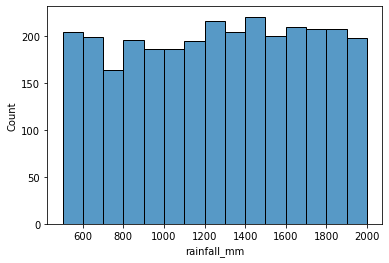

In [ ]:
rainfall_boxplot = sns.histplot(data=df, x="rainfall_mm")
soil_quality_boxplot = sns.histplot(data=df, x="soil_quality_index")
farm_size_boxplot = sns.histplot(data=df, x="farm_size_hectares")
sunlight_hours_boxplot = sns.histplot(data=df, x="sunlight_hours")
fertilizer_boxplot = sns.histplot(data=df, x="fertilizer_kg")
crop_yield_boxplot = sns.histplot(data=df, x="crop_yield")

From initial inspection, it appears that the data distribution is fairly uniform, which is an early indicator of well-balanced data for the prediction algorithms.

### Analysis

In [26]:
# Setting out the columns for the predictor and the outcome variable
X = df.iloc[:,  :-1]
y = df.iloc[:, -1]

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Linear Regression

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [39]:
regression_model = ols('crop_yield ~ rainfall_mm + soil_quality_index + farm_size_hectares + sunlight_hours + fertilizer_kg', data = df).fit()
anova_table = sm.stats.anova_lm(regression_model, typ=2)

/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/raymondguo/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

In [43]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"The training MSE was: {mse_train}")
print(f"The test MSE was: {mse_test}")

The training MSE was: 0.08455218454696534
The test MSE was: 0.08685748225314244


#### Decision Tree Analysis

In [46]:
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [53]:
y_pred_test_tree = tree_model.predict(X_test)
mse_test_tree = mean_squared_error(y_test, y_pred_test_tree)
print(f"The test MSE was: {mse_test_tree}")

The test MSE was: 120.965


In [58]:
from sklearn.tree import export_graphviz

In [60]:
export_graphviz(tree_model, out_file ='tree_structure.dot', 
               feature_names =['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg'])